In [31]:
#All code adapted from: https://www.kaggle.com/code/tard232003/20bd1a6754-basic-shapes
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import image
import os

# Input data files are available in the read-only "../input/" directory

for dirname, _, filenames in os.walk('shapes'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

shapes\circles\drawing(1).png
shapes\circles\drawing(10).png
shapes\circles\drawing(100).png
shapes\circles\drawing(11).png
shapes\circles\drawing(12).png
shapes\circles\drawing(13).png
shapes\circles\drawing(14).png
shapes\circles\drawing(15).png
shapes\circles\drawing(16).png
shapes\circles\drawing(17).png
shapes\circles\drawing(18).png
shapes\circles\drawing(19).png
shapes\circles\drawing(2).png
shapes\circles\drawing(20).png
shapes\circles\drawing(21).png
shapes\circles\drawing(22).png
shapes\circles\drawing(23).png
shapes\circles\drawing(24).png
shapes\circles\drawing(25).png
shapes\circles\drawing(26).png
shapes\circles\drawing(27).png
shapes\circles\drawing(28).png
shapes\circles\drawing(29).png
shapes\circles\drawing(3).png
shapes\circles\drawing(30).png
shapes\circles\drawing(31).png
shapes\circles\drawing(32).png
shapes\circles\drawing(33).png
shapes\circles\drawing(34).png
shapes\circles\drawing(35).png
shapes\circles\drawing(36).png
shapes\circles\drawing(37).png
shapes\cir

In [32]:
im=image.imread('shapes/squares/drawing(1).png')


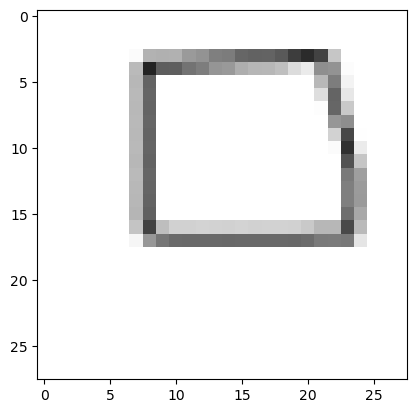

In [33]:
plt.imshow(im)

In [34]:

#Flattening the images, makes each image into 1d-array -> with the output
from PIL import Image
def load_imgs(impath):
    imgs=[]
    label=[]
    l1=os.listdir(impath)
    for i in l1:
        l2=os.listdir(impath+'/'+i)
        for j in l2:
            c=0
            img=Image.open(impath+i+'/'+j)
            img=img.resize(size=(32,32))
            img=img.convert('L')
            imgs.append(np.array(img).flatten())
            label.append(i)
            del img
    return np.array(imgs),label

In [35]:
#getting flattened images, each shape( triangle, circle, square) has 100 images, and each image is an array (32 x 32 = 1024 elements), 
# and the output y is the shape each array is associated with.
x,y=load_imgs('shapes/shapes/')
x.shape,len(y)

((300, 1024), 300)

In [36]:
# Printing possible truth - labels
target=pd.Series(y,dtype='category')
target

0        circles
1        circles
2        circles
3        circles
4        circles
         ...    
295    triangles
296    triangles
297    triangles
298    triangles
299    triangles
Length: 300, dtype: category
Categories (3, object): ['circles', 'squares', 'triangles']

In [37]:
t=target.cat.codes
t

0      0
1      0
2      0
3      0
4      0
      ..
295    2
296    2
297    2
298    2
299    2
Length: 300, dtype: int8

In [38]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,t,test_size=0.2,shuffle=True)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((240, 1024), (60, 1024), (240,), (60,))

In [39]:
#LOGISTIC REGRESSION model
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(max_iter=200,solver='saga')
lg.fit(train_x,train_y)

c:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=200, solver='saga')

In [40]:
yhat=lg.predict(test_x)   #making predictions, but modle might need more training, has no validation phase
yhat

array([0, 2, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 2, 1, 2, 2,
       1, 0, 1, 1, 1, 0, 0, 2, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 1, 2,
       1, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0], dtype=int8)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,yhat)   #computing accuarcy

0.55

In [42]:
#SVC model
from sklearn.svm import SVC 
lg=SVC()
lg.fit(train_x,train_y)

SVC()

In [51]:
yhat=lg.predict(test_x)
yhat
len(yhat)

60

In [44]:
accuracy_score(test_y,yhat)

0.55

In [ ]:
#Sequential Model (neural network)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(64,input_dim=train_x.shape[1],activation='relu',name='sh_dense1'))
model.add(Dense(3,activation='softmax',name='sh_dense2'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
model.fit(train_x,train_y,epochs=300)

In [46]:
z=model.evaluate(train_x,train_y)   #will have to change this so that model does not use the same data as training in the evaluation phase

8/8 [==============================] - 0s 1ms/step - loss: 0.6095 - accuracy: 0.9125


In [56]:
z=model.evaluate(test_x,test_y) # testing

2/2 [==============================] - 0s 4ms/step - loss: 16.2249 - accuracy: 0.5333


In [58]:
yhat=model.predict(test_x)   #using test data in prediction phase... need better split for phase, need to look at Jarryd Son notes notebooks for better split.

In [ ]:
accuracy_score(test_y,yhat)
